## Social Sensing Using ACCESS High Performance Computing
**Authors**: 

 Diya Li (Graduate Student, Cyberinfrastructure and Spatial Decision Intelligence Research Group, Texas A&M University)

Zhe Zhang (Assistant Professor, Cyberinfrastructure and Spatial Decision Intelligence Research Group, Texas A&M University) 


This training session is designed to introduce you to the fundamentals of social media mining and spatial analysis using High-Performance Research Computing (HPRC). We will explore various tools and techniques to extract, process, and analyze spatial data from social media platforms.

## Study Objectives

- **Understanding Social Sensing:** Gain a comprehensive understanding of social sensing as a method for gathering and interpreting data from social media platforms. This includes understanding how to leverage user-generated content as a valuable data source for various applications.

- **Utilizing HPRC in Social Sensing:** Learn how to effectively use HPRC resources to handle large-scale data processing tasks. This will involve training on how to configure and deploy computing resources for efficient data mining and analysis.

- **Practical Skills in Social Media Mining:** Develop practical skills in extracting and processing data from social media platforms. This includes learning about APIs, web scraping, and other techniques for data collection.

- **Spatial Analysis Techniques:** Master the techniques for spatial analysis of social media data. Learn how to interpret and visualize spatial data to uncover patterns, trends, and insights.

By the end of this session, students should be able to understand the principles of social sensing, effectively use HPRC for social sensing tasks, and apply their knowledge to real-world problems.


In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd        # Pandas for data manipulation and analysis
import numpy as np         # NumPy for numerical computing with arrays
import matplotlib.pyplot as plt  # Matplotlib's pyplot for creating static, animated, and interactive visualizations
import seaborn as sns      # Seaborn for statistical data visualization based on Matplotlib

# Handling warnings in Python
import warnings            # Import warnings module to manage warning messages

# Adding more specific comments about warnings
# This line will suppress all warnings of type UserWarning
# UserWarning is often raised in situations where the issue can be safely ignored
# This can help in making the notebook output cleaner and more readable
warnings.filterwarnings('ignore', category=UserWarning)


In [8]:
!python --version

Python 3.9.18


## The overview of the dataset

In [2]:
# Importing the os module to interact with the operating system
import os

# Setting the directory where the dataset is stored
dataset_directory = 'dataset'

# Initializing lists to hold the file paths of CSV and GeoJSON files
csv_files = []          # List for storing paths of CSV files
geojson_files = []      # List for storing paths of GeoJSON files

# Walking through each directory and subdirectory in the dataset_directory
for root, dirs, files in os.walk(dataset_directory):
    # Looping through each file in the current directory
    for file in files:
        # If the file ends with .csv, add it to the csv_files list
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))
        # Similarly, if the file ends with .geojson, add it to geojson_files list
        if file.endswith('.geojson'):
            geojson_files.append(os.path.join(root, file))

# Printing the paths of all CSV files found in the dataset directory
for csv_file in csv_files:
    print(csv_file)

# Printing the paths of all GeoJSON files found in the dataset directory
for geojson_file in geojson_files:
    print(geojson_file)


dataset/2020-02-concated_df-emo.csv
dataset/2020-03-concated_df.csv
dataset/2020-05-concated_df.csv
dataset/2020-01-concated_df.csv
dataset/2020-04-concated_df-emo.csv
dataset/2020-03-concated_df-emo.csv
dataset/2020-02-concated_df.csv
dataset/2020-05-concated_df-emo.csv
dataset/2020-01-concated_df-emo.csv
dataset/2020-04-concated_df.csv
dataset/2020-03-concated_df.geojson
dataset/2020-05-concated_df.geojson
dataset/2020-04-concated_df.geojson
dataset/2020-01-concated_df.geojson
dataset/2020-02-concated_df.geojson


## Dataset Overview

Our dataset consists of two types of files from social media data (primarily tweets) in 2020, organized by month:

### 1. Sentiment-Labelled CSV Files (`-emo.csv`)

These files (e.g., `2020-02-concated_df-emo.csv`) contain tweets that have been processed with sentiment labels, identifying the emotional tone of each tweet (positive, negative, neutral, or specific emotions).

```markdown
Example: `2020-02-concated_df-emo.csv` - Sentiment-labelled tweets from February 2020.
```

### 2. Geotagged Data in GeoJSON Files

GeoJSON files (e.g., `2020-03-concated_df.geojson`) include tweets with geotagging information, providing the geographical coordinates for each tweet. This format is useful for spatial analysis and mapping trends.

```markdown
Example: `2020-03-concated_df.geojson` - Geotagged tweets from March 2020.
```

These files offer insights into the sentiments expressed in tweets and their geographical distribution, allowing for a multifaceted analysis of social media trends throughout 2020.

In [3]:
# Load the CSV file
df = pd.read_csv('dataset/2020-01-concated_df.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,created_at,id,full_text,cleaned_text,entities,retweet_count,favorite_count,CountyId,user_name,user_followers_count,user_friends_count,user_listed_count,favourites_count,user_location,geo
0,2020-01-25 21:37:21+00:00,1221185310316322816,Getting ready. Many stores are sold out of med...,getting ready many stores sold medical facemas...,"{'hashtags': [{'text': 'FaceMasks', 'indices':...",0,2,6085.0,"William Bender, FCSI",6639,6466,361,16473,"San Jose, California","[-121.8865, 37.3376]"
1,2020-01-31 02:52:08+00:00,1223076466801250304,Thoughts? San Francisco :: As coronavirus fear...,thoughts san francisco fears mount fewer fligh...,"{'hashtags': [{'text': 'GraceShi', 'indices': ...",0,0,6075.0,Shaun Haines 力是亮,1,4970,0,7468,"San Francisco, CA","[-122.4190191, 37.7485909]"
2,2020-01-31 02:19:03+00:00,1223068144933097472,San Francisco :: San Francisco :: Trump under ...,san francisco san francisco trump growing pres...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,6081.0,Shaun Haines 力是亮,1,4970,0,7468,"San Francisco, CA","[-122.38733002, 37.73465621]"
3,2020-01-25 00:21:02+00:00,1220864116912345088,Thoughts? San Francisco :: Life science compan...,thoughts san francisco life science companies ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,6075.0,Shaun Haines 力是亮,1,4970,0,7468,"San Francisco, CA","[-122.3958528, 37.7929728]"
4,2020-01-25 00:38:17+00:00,1220868458314944512,"She was only 16. We’re heartbroken, we’re furi...",’ heabroken ’ furious ’ stop thinking loved on...,"{'hashtags': [{'text': 'MMIW', 'indices': [143...",9,26,NaN,B . YE L L O W T A I L,6233,464,75,3326,NaN,"[-107.613, 45.7318]"


In [4]:
# Display the columns of the dataframe
print(df.columns)
# introduce the attributes names

Index(['created_at', 'id', 'full_text', 'cleaned_text', 'entities',
       'retweet_count', 'favorite_count', 'CountyId', 'user_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'favourites_count', 'user_location', 'geo'],
      dtype='object')


## Dataset Columns Explanation

The dataset consists of the following columns, each representing a specific aspect of social media data, primarily from a platform like Twitter. Here's a brief overview of each column:

1. **created_at**: The date and time when the post was created. This information is crucial for temporal analysis and understanding the timing of posts.

2. **id**: A unique identifier for each post. This is essential for distinguishing between different posts.

3. **full_text**: The original text of the post. This column is vital for any text analysis, including sentiment analysis and topic modeling.

4. **cleaned_text**: A version of the post text that has been processed to remove noise. Cleaning may include removing special characters, correcting typos, or eliminating irrelevant sections.

5. **entities**: This could include various entities identified in the post, like hashtags, user mentions, URLs, etc. It's useful for extracting specific elements from the text.

6. **retweet_count**: The number of times the post has been retweeted. This can indicate the post's popularity or reach.

7. **favorite_count**: The number of times the post has been marked as a favorite (or liked). Another indicator of the post's popularity.

8. **CountyId**: An identifier for the geographic location, potentially linking the post to a specific county. This is key for spatial analysis.

9. **user_name**: The name of the user who posted. Useful for attributing the post and potentially for analyzing user-specific patterns.

10. **user_followers_count**: The number of followers the user has. This gives an idea of the user's influence or reach.

11. **user_friends_count**: The number of users the poster is following. Can be indicative of the user's network size.

12. **user_listed_count**: The number of lists the user is part of. This metric can also be a sign of influence or popularity.

13. **favourites_count**: The total number of posts the user has liked. This might reflect the user's interests or engagement level.

14. **user_location**: The self-reported location of the user. Important for geographical analysis and understanding the geographical distribution of users.

15. **geo**: Geographical coordinates associated with the post, if available. Crucial for detailed spatial analysis and mapping.

Each of these columns can provide valuable insights and are critical for comprehensive social media analysis, especially when combined with techniques like machine learning, natural language processing, and spatial analysis.

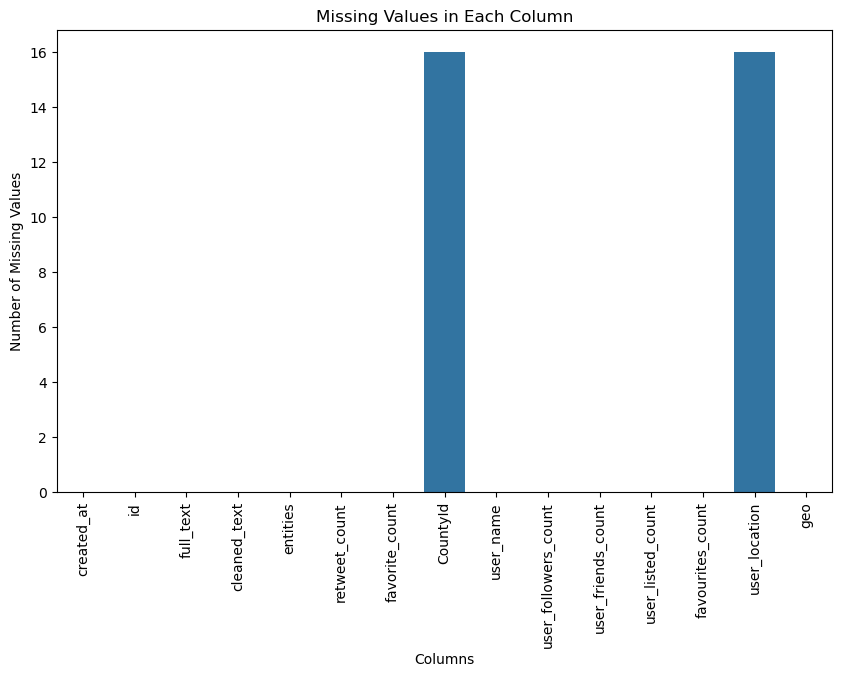

In [5]:
# Analyzing missing data in the DataFrame

# Calculate the number of missing values for each column in the DataFrame
# df.isnull() creates a boolean mask where True indicates missing values
# .sum() then sums up these True values column-wise, giving the total count of missing values per column
missing_values = df.isnull().sum()

# Plotting the missing values

# Setting up the figure size for the plot for better visibility and aesthetics
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn
# x=missing_values.index provides the column names for the x-axis
# y=missing_values.values provides the corresponding counts of missing values for the y-axis
sns.barplot(x=missing_values.index, y=missing_values.values)

# Rotating the x-axis labels by 90 degrees to make them readable as there can be many columns
plt.xticks(rotation=90)

# Setting the x-axis label to 'Columns'
plt.xlabel('Columns')

# Setting the y-axis label to 'Number of Missing Values'
plt.ylabel('Number of Missing Values')

# Setting the title of the plot for better understanding of what the plot represents
plt.title('Missing Values in Each Column')

# Displaying the plot
plt.show()


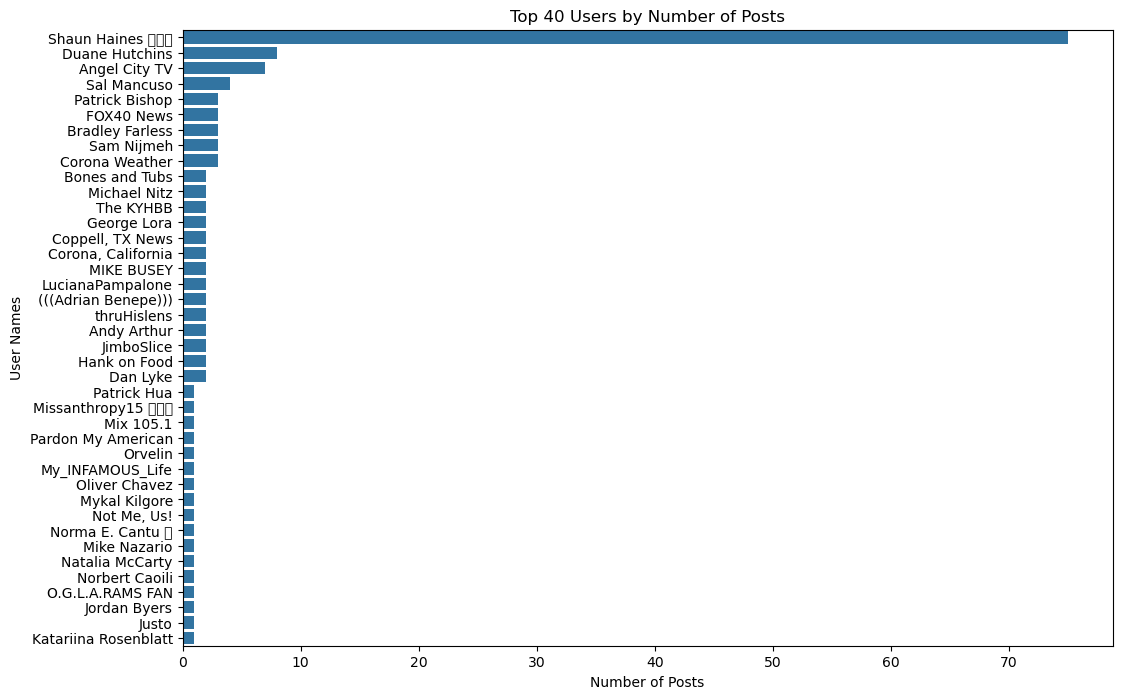

In [6]:
# Group by user and count the number of posts
user_post_counts = df.groupby('user_name').size().sort_values(ascending=False)

# Select the top 40 users
top_40_users = user_post_counts.head(40)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_40_users.values, y=top_40_users.index)
plt.xlabel('Number of Posts')
plt.ylabel('User Names')
plt.title('Top 40 Users by Number of Posts')
plt.show()

In [8]:
# Identify the most active user
most_active_user = user_post_counts.idxmax()

# Optional: Filter out the most active user from the dataset
# df = df[df['user_name'] != most_active_user]

#### Why this matter
Avoiding Data Skew: A single, highly active user can skew the analysis, especially in sentiment analysis or trend detection.

Representative Sampling: Ensuring that the dataset is representative of the broader population, not dominated by a few voices.

## Social Media Mining - Sentiment Analysis

In [7]:
import pandas as pd

# List of file names
file_names = [
    'dataset/2020-01-concated_df.csv',
    'dataset/2020-02-concated_df.csv',
    'dataset/2020-03-concated_df.csv',
    'dataset/2020-04-concated_df.csv',
    'dataset/2020-05-concated_df.csv'
]

# Load and concatenate the DataFrames
df_list = [pd.read_csv(file) for file in file_names]
large_df = pd.concat(df_list)

In [ ]:
import pandas as pd
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Function to apply sentiment analysis to a batch of texts
def apply_sentiment_to_batch(texts):
    try:
        results = pipe(texts, truncation=True, padding=True)
        return [result['label'] for result in results]
    except Exception as e:
        return [None] * len(texts)


# Define batch size
batch_size = 32  # Adjust this based on your memory constraints

# Start the timer
start_time = time.time()

# Apply sentiment analysis in batches
sentiments = []
for i in range(0, len(df), batch_size):
    batch_texts = df['cleaned_text'][i:i+batch_size].tolist()
    batch_sentiments = apply_sentiment_to_batch(batch_texts)
    sentiments.extend(batch_sentiments)

df['sentiment'] = sentiments

# End the timer
end_time = time.time()

# Calculate and print the total time taken
total_time = end_time - start_time
print(f"Total time for sentiment analysis: {total_time} seconds")


In [21]:
import pandas as pd
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from multiprocessing import Pool, cpu_count

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Function to apply sentiment analysis
def apply_sentiment(text):
    try:
        result = pipe(text)
        return result[0]['label']
    except Exception as e:
        return None

# Function to process each chunk of the DataFrame
def process_chunk(chunk):
    chunk['sentiment'] = chunk['cleaned_text'].apply(apply_sentiment)
    return chunk

# Main processing function
def parallelize_dataframe_processing(df, func, n_cores):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# Start the timer
start_time = time.time()

# Parallelize sentiment analysis
n_cores = cpu_count()  # Or set this to the number of cores you want to use
print(n_cores, "CPU can use.")
df = parallelize_dataframe_processing(large_df, process_chunk, 10)

# End the timer
end_time = time.time()

# Calculate and print the total time taken
total_time = end_time - start_time
print(f"Total time for sentiment analysis: {total_time} seconds")
# 432

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


64 CPU can use.


/scratch/user/u.dl128757/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Token indices sequence length is longer than the specified maximum sequence length for this model (151 > 128). Running this sequence through the model will result in indexing errors


Total time for sentiment analysis: 445.39294052124023 seconds


The `transformers` library can perform sentiment analysis effectively due to its underlying model architecture and training. The model used in your case, `bertweet-base-sentiment-analysis`, is a variant of the BERT model (Bidirectional Encoder Representations from Transformers), specifically fine-tuned for sentiment analysis on Twitter data. Here's a breakdown of why this model is effective:

1. **BERT Model**: BERT models are pre-trained on a large corpus of text and then fine-tuned for specific tasks like sentiment analysis. They are designed to understand the context of a word in a sentence, which is crucial for accurately determining sentiment[2].

2. **Fine-tuning on Twitter Data**: The `bertweet-base-sentiment-analysis` model is specifically fine-tuned on Twitter data, making it adept at handling the nuances, slang, and abbreviations commonly found in tweets [1].

3. **Bidirectional Context**: BERT models are bidirectional, meaning they consider the context from both the left and right sides of a token in the sentence. This helps in better understanding the sentiment expressed in a tweet.

4. **Transfer Learning**: The model leverages transfer learning, where knowledge gained while learning one task is applied to a different but related task (in this case, sentiment analysis).

### Plotting the Distribution of Sentiment Analysis Results

To visualize the distribution of the sentiment analysis results, you can use libraries like Matplotlib or Seaborn to create a bar plot. Here's how you can do it:

## Now next:

This code will create a bar chart showing the number of tweets for each sentiment category (POS, NEG, NEU). The chart will give you a visual representation of how sentiments are distributed across your dataset.

Keep in mind, while `transformers` provide powerful tools for NLP tasks like sentiment analysis, the results are dependent on the quality of data, model choice, and fine-tuning. It's also crucial to interpret the results in the context of your specific use case and dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sentiment' is the column with sentiment analysis results
sentiment_counts = df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Analysis Results')
plt.show()


In [ ]:
import pandas as pd

# Option 2: Fill missing values with a placeholder (e.g., -1) and handle it in later analysis
df['CountyId'] = df['CountyId'].fillna(-1)

# Convert to integers
df['CountyId'] = df['CountyId'].astype(int)

# Convert to string
df['CountyId'] = df['CountyId'].astype(str)

# Check the conversion
print(df['CountyId'].head())


## Converting `CountyId` from Float to Integer String

In order to plot sentiment data on a map, we need to associate each tweet with a specific geographic location. In our dataset, this information is represented by the `CountyId` column. However, the `CountyId` is currently in a float format, which is not ideal for mapping purposes. We need to convert this column to a string format representing integer values. 

Here's the process to do this conversion:

1. **Handle Missing Values**: Check for and decide how to handle any missing values in the `CountyId` column.
2. **Convert to Integers**: Change the datatype from float to integer.
3. **Convert to String**: Finally, convert the integer values to strings.

### Explanation:

- **Handling Missing Values**: We must decide how to handle missing values. One approach is to drop these rows, but this might lead to loss of valuable data. Another approach is to fill them with a placeholder value. The choice depends on the context of your analysis and how you plan to handle such cases in the mapping process.

- **Data Type Conversion**: Converting the `CountyId` first to integer ensures that we get rid of any decimal points, and then converting to string makes it suitable for categorization or mapping where string identifiers are needed.

This conversion is crucial for accurately mapping the sentiment data to specific geographic locations, which can provide valuable spatial insights into the sentiment distribution.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load geospatial data
geo_data = gpd.read_file('geojson-counties-fips.json')

# Convert 'CountyId' in geo_data to string (if necessary)
geo_data['CountyId'] = geo_data['id'].astype(str)

# Define bounding box coordinates for the contiguous United States
minx, miny, maxx, maxy = -124.848974, 24.396308, -66.885444, 49.384358

# Filter the GeoDataFrame
geo_data = geo_data.cx[minx:maxx, miny:maxy]

# Merge your DataFrame with the geospatial data
merged_data = geo_data.merge(df, on='CountyId', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot base layer of all counties
geo_data.plot(ax=ax, color='lightgrey')

# Overlay with sentiment data (choose a column for color-coding)
merged_data.plot(column='sentiment', ax=ax, legend=True, categorical=True, alpha=0.7)

# Add titles and labels as necessary
plt.title('Sentiment Analysis by County')
plt.show()

## Practice Exercise: Aggregating and Plotting Sentiment Data

In this exercise, you will aggregate multiple datasets containing Twitter sentiment data from January to May 2020. Your task is to combine these datasets into a single DataFrame and then visualize the aggregated sentiment data on a map of the contiguous United States.

### Steps:

1. **Aggregate Datasets**: Load and concatenate the datasets from January to May 2020.

2. **Prepare the Data**: Ensure the `CountyId` column is in the correct format for later merging with geospatial data.

3. **Visualize on a Map**: Plot the combined data on a map, focusing on the contiguous United States.

### Code Example:

First, load and concatenate the datasets:

```python
import pandas as pd

# List of file names
file_names = [
    'dataset/2020-01-concated_df.csv',
    'dataset/2020-02-concated_df.csv',
    'dataset/2020-03-concated_df.csv',
    'dataset/2020-04-concated_df.csv',
    'dataset/2020-05-concated_df.csv'
]

# Load and concatenate the DataFrames
df_list = [pd.read_csv(file) for file in file_names]
combined_df = pd.concat(df_list)

# Ensure 'CountyId' is a string (if you're planning to merge with GeoDataFrame later)
combined_df['CountyId'] = combined_df['CountyId'].astype(str)
```

After preparing the aggregated data, follow the steps provided in the previous lectures to:

- Load the geospatial data for the contiguous United States.
- Merge the sentiment data with the geospatial data.
- Plot the data using GeoPandas, focusing on the sentiment distribution across different counties.

In [ ]:
import pandas as pd

# List of file names
file_names = [
    'dataset/2020-01-concated_df.csv',
    'dataset/2020-02-concated_df.csv',
    'dataset/2020-03-concated_df.csv',
    'dataset/2020-04-concated_df.csv',
    'dataset/2020-05-concated_df.csv'
]

# Load and concatenate the DataFrames
df_list = [pd.read_csv(file) for file in file_names]
combined_df = pd.concat(df_list)

## Next Topic: Demographer and Ethical Issues in Social Media Analysis
Understanding the demographics of users is crucial for gaining comprehensive insights. However, this pursuit brings forth significant ethical considerations. This section will delve into the intricacies of demography in social media, focusing on how we can define and analyze Twitter user demographics. We will also address the ethical issues that arise in this context.

Demographics, which include factors like age, gender, location, and socio-economic status, play a pivotal role in shaping opinions, trends, and interactions on social media platforms. Analyzing these aspects can provide deeper understanding of social media dynamics and audience characteristics.

### Ethical Considerations

When analyzing demographics, it's imperative to navigate the ethical landscape carefully. Key considerations include:

1. **Privacy and Consent**: Social media users often share information without expecting it to be used for demographic analysis. Respecting their privacy and obtaining proper consent, where applicable, is essential.

2. **Data Sensitivity**: Some demographic data, like ethnicity or political affiliation, can be sensitive. Handling such data requires tact and an awareness of potential biases and misuse.

3. **Anonymity and Aggregation**: To maintain user privacy, it's often advisable to anonymize data and present findings in aggregate form rather than focusing on individual users.

4. **Avoiding Stereotypes**: While demographic analysis can reveal trends, it's crucial to avoid reinforcing stereotypes or making broad generalizations about particular groups.

### Practical Application: Twitter User Demography Analysis

In the following exercises, we will use tools designed to estimate the demographics of Twitter users based on their public information. This will involve:

- Utilizing specialized algorithms and tools to infer demographic attributes.
- Conducting a thorough analysis to understand the diverse makeup of the Twitter audience.
- Interpreting the results in a way that is respectful, ethical, and mindful of privacy concerns.

In [ ]:
# Initialize the pipeline
pipe = pipeline("text-classification", model="tanoManzo/minilm-finetuned-mimic-race-ethnicity-multi-label", return_all_scores=True)

To analyze ethnicity and race by name using a text classification model from the `transformers` library, you'll be utilizing a pipeline with the model `tanoManzo/minilm-finetuned-mimic-race-ethnicity-multi-label`. This model is presumably fine-tuned to classify names based on race and ethnicity. However, it's crucial to approach and interpret the results of such models with caution due to ethical and accuracy concerns. Here's a guide to using this model in a responsible manner:

### Ethical Considerations

1. **Accuracy and Generalization**: Models predicting race or ethnicity based on names can have limitations in accuracy and may not generalize well across diverse global names.
2. **Sensitive Nature of Data**: Classification of individuals based on race and ethnicity is a sensitive matter and can lead to stereotyping or misinterpretation.
3. **Purpose of Analysis**: Ensure that the purpose of your analysis is ethical, respects privacy, and does not intend to discriminate or harm.


To analyze ethnicity and race based on Twitter usernames using the specified pipeline, you'll need to write code that processes each username through the pipeline, extracts the relevant labels with the highest scores (while excluding certain labels), and then assigns these results back to your DataFrame. 

In [ ]:
# You need a function that processes the pipeline's output to extract the highest-scoring ethnicity and race labels, excluding the specified labels.
def get_ethnicity_race(username):
    # Filter and process if the username is a non-empty string
    if isinstance(username, str) and username.strip():
        try:
            results = pipe(username)
            # Extract ethnicity and race results
            ethnicity = max((r for r in results[0] if r['label'].startswith('ETH') and 
                             'No Information' not in r['label'] and 
                             'Not Covered' not in r['label']), 
                            key=lambda x: x['score'], 
                            default=None)
            race = max((r for r in results[0] if r['label'].startswith('RACE') and 
                        'No Information' not in r['label'] and 
                        'Not Covered' not in r['label']), 
                       key=lambda x: x['score'], 
                       default=None)

            return {
                'Ethnicity': ethnicity['label'] if ethnicity else None,
                'Race': race['label'] if race else None
            }
        except Exception as e:
            return {'Ethnicity': None, 'Race': None}
    else:
        return {'Ethnicity': None, 'Race': None}

In [ ]:
# Assuming df is your DataFrame and 'user_name' is the column with usernames
results = combined_df['user_name'].apply(get_ethnicity_race)
combined_df['Predicted_Ethnicity'] = results.apply(lambda x: x['Ethnicity'])
combined_df['Predicted_Race'] = results.apply(lambda x: x['Race'])

In [ ]:
# Calculate percentage distribution for Ethnicity
ethnicity_counts = combined_df['Predicted_Ethnicity'].value_counts(normalize=True) * 100
# Calculate percentage distribution for Race
race_counts = combined_df['Predicted_Race'].value_counts(normalize=True) * 100

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Ethnicity Distribution (in percentage)
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index)
plt.title('Distribution of Predicted Ethnicities (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Ethnicity')
plt.show()

To determine whether Hispanic or non-Hispanic users have more positive posts, you'll need to perform a comparison based on the sentiment analysis results and the predicted ethnicity. Assuming you have a column for sentiment (e.g., 'sentiment') and a column for predicted ethnicity (e.g., 'Predicted_Ethnicity'), here’s how you can approach this:

In [ ]:
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

combined_df['sentiment'] = combined_df['cleaned_text'].apply(apply_sentiment)

In [ ]:
# Filter the DataFrame for Hispanic and Non-Hispanic users
hispanic_df = combined_df[combined_df['Predicted_Ethnicity'] == 'ETH Hispanic/Latino/Latina/Latinx']
non_hispanic_df = combined_df[combined_df['Predicted_Ethnicity'] == 'ETH Non-Hispanic/Non-Latino/Non-Latina/Non-Latinx']

# Count the number of positive posts for each group
positive_hispanic = hispanic_df[hispanic_df['sentiment'] == 'POS'].count()['sentiment']
positive_non_hispanic = non_hispanic_df[non_hispanic_df['sentiment'] == 'POS'].count()['sentiment']

# Print the results
print("Number of positive posts by Hispanic users:", positive_hispanic)
print("Number of positive posts by Non-Hispanic users:", positive_non_hispanic)


In [ ]:
import pandas as pd

# Group by ethnicity and sentiment and count occurrences
grouped_data = combined_df.groupby(['Predicted_Ethnicity', 'sentiment']).size().reset_index(name='count')

# Filter for only Hispanic and Non-Hispanic groups
filtered_data = grouped_data[grouped_data['Predicted_Ethnicity'].isin(['ETH Hispanic/Latino/Latina/Latinx', 
                                                                       'ETH Non-Hispanic/Non-Latino/Non-Latina/Non-Latinx'])]
# Calculate total counts for each ethnicity group
total_counts = filtered_data.groupby('Predicted_Ethnicity')['count'].sum()

# Calculate percentages
filtered_data['percentage'] = filtered_data.apply(lambda x: (x['count'] / total_counts[x['Predicted_Ethnicity']]) * 100, axis=1)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='sentiment', y='percentage', hue='Predicted_Ethnicity', data=filtered_data)
plt.title('Sentiment Distribution among Hispanic and Non-Hispanic Users (Percentage)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.legend(title='Ethnicity')

# Add percentage annotations on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


## Exercise: Analyzing Race in Twitter Data

### Objective

In this exercise, you will perform an analysis of the Twitter data to understand the distribution of sentiments across different racial groups. The objective is to gain insights into how sentiments are expressed differently among these groups and to explore the nuances in social media behavior related to race.

### Task Description

Your task involves the following steps:

1. **Data Preparation**: Utilize the previously established pipeline to predict the race of Twitter users based on their usernames. The pipeline should return categories like 'RACE Black or African American', 'RACE Asian', 'RACE White', etc.

2. **Sentiment Analysis**: For each tweet, you already have sentiment labels (Positive, Negative, Neutral). Use these labels for further analysis.

3. **Aggregate Data**: Group the data by the predicted race and sentiment. Calculate the count of each sentiment within each racial group.

4. **Visualization**: Create a bar chart that shows the distribution of sentiments within each racial group. Enhance your visualization by displaying the data in terms of percentages rather than raw counts to standardize comparisons across groups.

5. **Interpretation**: Write a brief analysis of your findings. Discuss any noticeable trends or patterns in sentiment distribution across different racial groups. 

### Code Snippet

Here is a snippet to help you get started with the aggregation and plotting:

```python
# Assuming 'Predicted_Race' and 'sentiment' columns are in your DataFrame
grouped_data = df.groupby(['Predicted_Race', 'sentiment']).size().reset_index(name='count')

# Calculate total counts for each race group
total_counts = grouped_data.groupby('Predicted_Race')['count'].sum()

# Calculate percentages
grouped_data['percentage'] = grouped_data.apply(lambda x: (x['count'] / total_counts[x['Predicted_Race']]) * 100, axis=1)

# Plotting
# (Your code for the bar plot goes here, similar to the previous ethnicity exercise)
```

### Reflection

- **Ethical Considerations**: Reflect on the ethical implications of analyzing race in social media. Discuss the potential biases in the data and the limitations of algorithmic predictions.
- **Cultural Sensitivity**: Ensure that your analysis and interpretation are done with cultural sensitivity and awareness of the complexity and diversity within and across racial groups.

This exercise will help you develop a deeper understanding of how social media sentiment varies across different racial demographics and enhance your skills in data analysis and visualization.

# References:
1. Pérez, J. M., Giudici, J. C., & Luque, F. (2021). pysentimiento: A Python Toolkit for Sentiment Analysis and SocialNLP tasks. arXiv. https://arxiv.org/abs/2106.09462
2. Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv. https://arxiv.org/abs/1810.04805